# Statistiques

## Nom: Wilmar QUIROGA

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import norm, chi2, gaussian_kde

In [ ]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [ ]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)


In [ ]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [ ]:
regions = list(df.region.unique())

In [ ]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [ ]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [ ]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

array([[<Axes: title={'center': 'consumption'}>]], dtype=object)

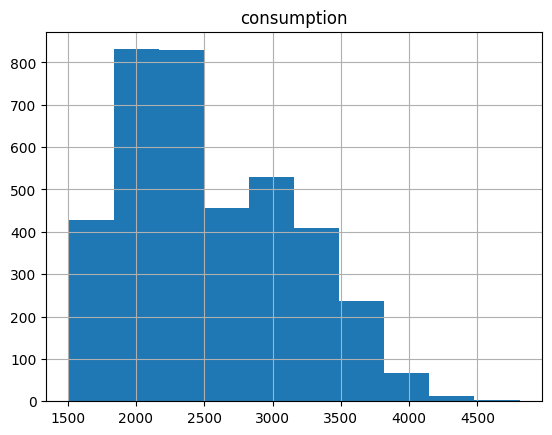

In [ ]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]
df_region.hist()

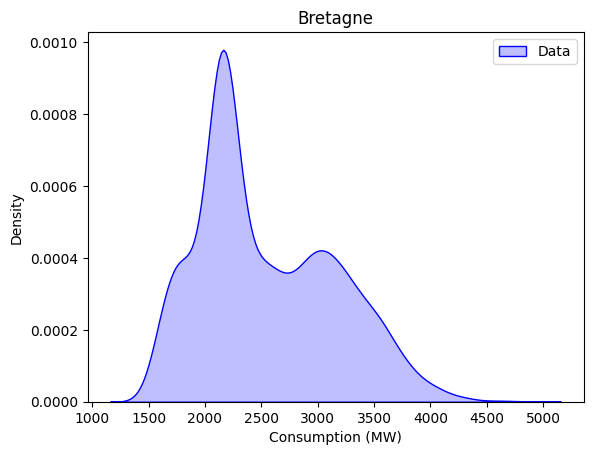

In [ ]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne.

**1.** Montrez que les estimateur pour la moyenne et la variance sont sans biais.

 Pour démontrer que les estimateurs de la moyenne ($\hat{\mu}$) et de la variance ($\hat{\sigma}^2$) sont sans biais, on  doit calculer l'espérance de ces estimateurs  et montrer que ces valeurs attendues sont égales aux paramètres réels de la population.

**1.1** si on calcule l'espérance de l'estimateur de la variance:
\begin{align*}
E(\hat{\mu}) = E\left(\frac{1}{n} \sum_{i=1}^n x_i\right)
= \frac{1}{n} \sum_{i=1}^n E(x_i)
\end{align*}

Étant donné que les $x_i$ sont supposées i.i.d. selon une distribution gaussienne, l'espérance de chaque variable $x_i$ est égale à la véritable moyenne de la population, qui est $\mu$. alors
$$ E(\hat{\mu}) = \frac{1}{n} \sum_{i=1}^n \mu = \frac{n}{n} \cdot \mu = \mu$$

L'espérance de l'estimateur de la moyenne étant égale à la véritable moyenne de la population, cela confirme que l'estimateur de la moyenne est sans biais. \\
**1.2** si on calcule l'espérance de l'estimatuer de la variance:
\begin{align*}
E(\hat{\sigma^2}) = E\left(\frac{1}{n-1} \sum_{i=1}^n (x_i - \hat{\mu})^2\right) = \frac{1}{n-1} \sum_{i=1}^n E((x_i - \hat{\mu})^2)
\end{align*}

De manière similaire à ce qui a été mentionné précédemment, lorsque les variables aléatoires $x_i$ sont i.i.d., et en tenant compte de certaines propriétés de l`espérance, on développe les termes comme ci-dessous;

\begin{align*}
E(\hat{\sigma^2}) = \frac{1}{n-1} E\left(\sum_{i=1}^n (x_i - \hat{\mu})^2\right) = \frac{1}{n-1} E\left(\sum_{i=1}^n (x_i^2 - 2 x_i\hat{\mu}+ \hat{\mu}^2) \right) = \frac{1}{n-1} E\left(\sum_{i=1}^n (x_i^2) - 2\hat{\mu} \sum_{i=1}^n (x_i) + \sum_{i=1}^n (\hat{\mu}^2) \right)
\end{align*}

\begin{align*}
E(\hat{\sigma^2})  = \frac{1}{n-1} E\left(\sum_{i=1}^n (x_i^2) - 2\hat{\mu}^2 n + \hat{\mu}^2 n \right)= \frac{1}{n-1} E\left(\sum_{i=1}^n (x_i^2) - \hat{\mu}^2 n \right) = \frac{1}{n-1} \sum_{i=1}^n E(x_i^2) - n E(\hat{\mu}^2)
\end{align*}

\begin{align*}
E(\hat{\sigma^2}) = \frac{1}{n-1} \sum_{i=1}^n(\sigma^2 + \mu^2) - n (\frac{\sigma^2}{n} + \mu^2) = \frac{1}{n-1} (n\sigma^2 + n \mu^2 - n \sigma^2 - n \mu^2) =\frac{1}{n-1} (\sigma^2(n-1)) = \sigma^2
\end{align*}


L'espérance de l'estimateur de la variance est égale à la variance réelle de la population, ce qui prouve que l'estimateur de la variance est sans biais.

**2.** Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [ ]:
mean_Bretagne=sum(df_region["consumption"])/len(df_region["consumption"])
print("En utilisant les estimateurs, la moyenne de la région Bretagne est égale à :" + str(mean_Bretagne))

variance_Bretagne = sum((xi - mean_Bretagne) ** 2 for xi in df_region["consumption"]) / (len(df_region["consumption"])-1)
print("En utilisant les estimateurs, la variance de la région Bretagne est égale à :" + str(variance_Bretagne))

En utilisant les estimateurs, la moyenne de la région Bretagne est égale à :2546.536155666579
En utilisant les estimateurs, la variance de la région Bretagne est égale à :365956.01414481626


**3.** Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

À partir des valeurs de la moyenne et de la variance trouvées ci-dessus, et du nombre d'échantillons, on peut utiliser la fonction $randon.normal()$ pour générer de nouvelles données.

In [ ]:
n=len(df_region["consumption"])
sigma=np.sqrt(variance_Bretagne)
New_data = np.random.normal(mean_Bretagne,sigma,n)

**4.** Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

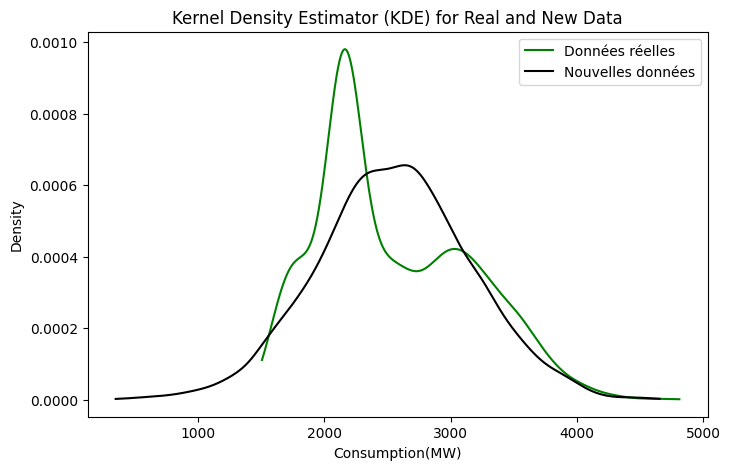

In [ ]:
# L'une des méthodes d'estimation de la PDF consiste à utiliser la méthode d'estimation de la densité de Kernel.
# Tout d'abord, on commence par l'estimation des données réelles.

Data_Consumption=df_region["consumption"]
kde_real = gaussian_kde(Data_Consumption)
x_real = np.linspace(Data_Consumption.min() - 1, Data_Consumption.max() + 1, n)
density_real = kde_real(x_real)

# Estimation de la densité des données générées avec KDE
kde_new = gaussian_kde(New_data)
x_new = np.linspace(New_data.min() - 1, New_data.max() + 1, n)
density_new = kde_new(x_new)

# Graphique de l'estimateur de la densité du noyau
plt.figure(figsize=(8,5))
plt.plot(x_real, density_real, label='Données réelles', color='green')
plt.plot(x_new, density_new, label='Nouvelles données', color='black')
plt.xlabel('Consumption(MW)')
plt.ylabel('Density')
plt.title('Kernel Density Estimator (KDE) for Real and New Data')
plt.legend()
plt.show()

**5.** Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

In [ ]:
# La première étape consiste à obtenir des échantillons les jours d'hiver.
Region_Date= df_region.copy()
Region_Date.sort_values(by='date',ascending=False)

# Convert the 'date' column to a datetime data type
Region_Date['date'] = pd.to_datetime(Region_Date['date'])

# Define the start date (December 22th)
start_date = pd.to_datetime('2013-12-22')
# Define the end date (March 12th)
end_date = pd.to_datetime('2014-03-21')
filtered_data_in = Region_Date[(Region_Date['date'] >= start_date) & (Region_Date['date'] <= end_date)]

for x in range (2014,2023):
  start_date=pd.to_datetime(str(x)+'-12-22')
  end_date = pd.to_datetime(str(x+1)+'-03-21')
  filtered_data = Region_Date[(Region_Date['date'] >= start_date) & (Region_Date['date'] <= end_date)]
  Data_Final=pd.concat([filtered_data_in, filtered_data],axis=0)
  # Create a new DataFrame containing only the data within the specified date range
  filtered_data_in=Data_Final

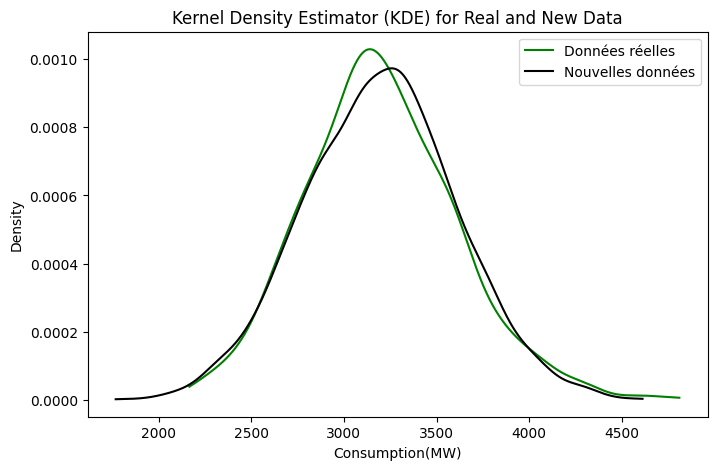

In [ ]:
# L'une des méthodes d'estimation de la PDF consiste à utiliser la méthode d'estimation de la densité de Kernel.
# Tout d'abord, on commence par l'estimation des données réelles.

Data_Consumption=Data_Final["consumption"]
kde_real_winter = gaussian_kde(Data_Consumption)
x_realw = np.linspace(Data_Consumption.min() - 1, Data_Consumption.max() + 1, n)
density_realw = kde_real_winter(x_realw)

# Génération de données avec les estimateurs de moyenne et de variance
new_data_mean = np.mean(Data_Consumption)
new_data_std = np.std(Data_Consumption, ddof=1) # Utilisez l'estimateur de la variance
New_data_winter = np.random.normal(new_data_mean, new_data_std, n)

# Estimation de la densité des données générées avec KDE
kde_new_winter = gaussian_kde(New_data_winter)
x_new_winter= np.linspace(New_data_winter.min() - 1, New_data_winter.max() + 1, n)
density_new_winter = kde_new_winter(x_new_winter)

# Graphique de l'estimateur de la densité du noyau
plt.figure(figsize=(8,5))
plt.plot(x_realw, density_realw, label='Données réelles', color='green')
plt.plot(x_new_winter, density_new_winter, label='Nouvelles données', color='black')
plt.xlabel('Consumption(MW)')
plt.ylabel('Density')
plt.title('Kernel Density Estimator (KDE) for Real and New Data')
plt.legend()
plt.show()

**6.** Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

**6.1** L'un des cas est celui où la distribution est proche des données réelles : dans certains cas, même si les données ne sont pas strictement gaussiennes, la distribution normale peut être une approximation raisonnable de la distribution réelle. Cela est particulièrement vrai lorsque la distribution des données est symétrique et proche d'une distribution gaussienne. Par exemple, les courbes PDF ci-dessus nous permettent de conclure que les distributions pour les mois d'hiver sont beaucoup plus proches d'une distribution normale que les données pour l'ensemble de l'année.  

**6.2** Lorsque les échantillons de données sont de taille assez importante, on suppose généralement que les données sont approximativement gaussiennes en raison du théorème de la limite centrale. Ce théorème énonce que la somme de nombreuses observations indépendantes et identiquement distribuées tend à converger vers une distribution normale (gaussienne)


## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

**1.** Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

  **1.1** Démontrons que $d(f, g) \in [0, 1]$ : Toute fonction a une valeur absolue qui est toujours positive ou nulle, ce qui signifie que $|f(x) - g(x)| \geq 0$, En intégrant une quantité positive ou nulle, la valeur de $d(f, g)$ est toujours positive ou nulle. Le fait de multiplier par $1/2$ à l'extérieur de l'intégrale n'affecte pas le fait que $d(f,g)$ est toujours positif ou nul. Ainsi, $ 0 \leq d(f, g) \leq 1 $ \\
  **1.2**  Alors si $d(f, g) = 0$  cela signifie que l'intégrale de $|f(x) - g(x)|=0$ par laquelle $|f(x) - g(x)| = 0$ presque partout, c'est-à-dire que
  $f(x)=g(x)$ quasiment en tout pour la mesure de Lebesgue.  
  **1.3** si $d(f, g) = 1$ cela signifie que l'intégrale de $|f(x) - g(x)|=1$ Par conséquent, la différence entre $f(x)$ et $g(x)$ est non nulle dans au moins une région non triviale de l'espace (pour la mesure de Lebesgue). En d'autres termes, les fonctions $f$ et $g$ ont des supports disjoints.

  Finalement, on a démontré que $d(f, g) \in [0, 1]$ et que $d(f, g) = 0$ si et seulement si $f=g$ quasiment en tout pour la mesure de Lebesgue, et $d(f, g) = 1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

**2.** Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [ ]:
# Comme nous avons déjà calculé les KDE dans la section A et pris en compte la mesure de dissimilarité, on peut procéder à l'intégration numérique.
from scipy.integrate import quad
# Intégrande de la dissimilarité
integrand = lambda x: (1/2) * abs(kde_real(x) - kde_new(x))
# Calculez la dissimilarité en effectuant l'intégration numérique
dissimilarity, _ = quad(integrand, x_real.min(), x_real.max())

# La valeur de "dissimilarity" représente la dissimilarité entre le KDE des données réelles et la densité des nouvelles données.
print("la dissimilarité entre le KDE des des données réelles et de la densité du modèle gaussien est égale à :" + str(dissimilarity))

la dissimilarité entre le KDE des des données réelles et de la densité du modèle gaussien est égale à :0.15978408600256985


**3.** Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [ ]:
# Comme nous avons déjà calculé les KDE dans la section A et pris en compte la mesure de dissimilarité, on peut procéder à l'intégration numérique.
# Intégrande de la dissimilarité
integrand = lambda x: (1/2) * abs(kde_real_winter(x) - kde_new_winter(x))

# Calculez la dissimilarité en effectuant l'intégration numérique
dissimilarity, _ = quad(integrand, x_realw.min(), x_realw.max())

# La valeur de "dissimilarity" représente la dissimilarité entre le KDE des données réelles et la densité des nouvelles données.
print("la dissimilarité entre le KDE des des données réelles et de la densité du modèle gaussien est égale à :" + str(dissimilarity))

la dissimilarité entre le KDE des des données réelles et de la densité du modèle gaussien est égale à :0.03775160395346713


En rappelant que on conclut que les distributions des mois d'hiver sont beaucoup plus proches d'une distribution normale que les données de toute l'année. Ceci est corroboré par le fait que la mesure de dissimilarité est beaucoup plus petite pour les mois d'hiver, ce qui indique que les fonctions de densité sont très proches l'une de l'autre.

**4.** Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [ ]:
# Créer des dataframes pour toutes les régions
dataframe_collection = {}
count=0
for regionm in regions:
  dataframe_collection[count]=df[df.region == regionm]
  count=count+1

dissimilarities=np.zeros(12)

for key in dataframe_collection.keys():
  Data_Consumption=dataframe_collection[key]["consumption"]
  kde_real = gaussian_kde(Data_Consumption)
  x_real = np.linspace(Data_Consumption.min() - 1, Data_Consumption.max() + 1, len(Data_Consumption))
  density_real = kde_real(x_real)
  # Génération de données avec les estimateurs de moyenne et de variance
  new_data_mean = np.mean(Data_Consumption)
  new_data_std = np.std(Data_Consumption, ddof=1) # Utilisez l'estimateur de la variance
  New_data= np.random.normal(new_data_mean, new_data_std, len(Data_Consumption))
  # Estimation de la densité des données générées avec KDE
  kde_new = gaussian_kde(New_data)
  x_new = np.linspace(New_data.min() - 1, New_data.max() + 1, len(Data_Consumption))
  density_new = kde_new(x_new)
  # Calcule de la dissimilarité en effectuant l'intégration numérique
  integrand = lambda x: (1/2) * abs(kde_real(x) - kde_new(x))
  dissimilarities[key], _ = quad(integrand, x_real.min(), x_real.max())

<ipython-input-50-55ed6a1845cd>:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  dissimilarities[key], _ = quad(integrand, x_real.min(), x_real.max())


In [ ]:
dataframe_collection_Winter = {}
dissimilarities_Winter=np.zeros(12)
for key in dataframe_collection.keys():
  # La première étape consiste à obtenir des échantillons les jours d'hiver.
  Region_Date= dataframe_collection[key].copy()
  Region_Date.sort_values(by='date',ascending=False)
  # Convert the 'date' column to a datetime data type
  Region_Date['date'] = pd.to_datetime(Region_Date['date'])
  # Define the start date (December 22th)
  start_date = pd.to_datetime('2013-12-22')
  # Define the end date (March 12th)
  end_date = pd.to_datetime('2014-03-21')
  filtered_data_in = Region_Date[(Region_Date['date'] >= start_date) & (Region_Date['date'] <= end_date)]
  for x in range (2014,2023):
    start_date=pd.to_datetime(str(x)+'-12-22')
    end_date = pd.to_datetime(str(x+1)+'-03-21')
    filtered_data = Region_Date[(Region_Date['date'] >= start_date) & (Region_Date['date'] <= end_date)]
    Data_Final=pd.concat([filtered_data_in, filtered_data],axis=0)
    # Create a new DataFrame containing only the data within the specified date range
    filtered_data_in=Data_Final
  dataframe_collection_Winter[key]=Data_Final

for key in dataframe_collection.keys():
  Data_Consumption=dataframe_collection_Winter[key]["consumption"]
  kde_real = gaussian_kde(Data_Consumption)
  x_real = np.linspace(Data_Consumption.min() - 1, Data_Consumption.max() + 1, len(Data_Consumption))
  density_real = kde_real(x_real)
  # Génération de données avec les estimateurs de moyenne et de variance
  new_data_mean = np.mean(Data_Consumption)
  new_data_std = np.std(Data_Consumption, ddof=1) # Utilisez l'estimateur de la variance
  New_data= np.random.normal(new_data_mean, new_data_std, len(Data_Consumption))
  # Estimation de la densité des données générées avec KDE
  kde_new = gaussian_kde(New_data)
  x_new = np.linspace(New_data.min() - 1, New_data.max() + 1, len(Data_Consumption))
  density_new = kde_new(x_new)
  # Calcule de la dissimilarité en effectuant l'intégration numérique
  integrand = lambda x: (1/2) * abs(kde_real(x) - kde_new(x))
  dissimilarities_Winter[key], _ = quad(integrand, x_real.min(), x_real.max())


columns2 = ["region", "Mesure de dissimilarité","Mesure de dissimilarité Winter" ]
NData=np.transpose(np.array([regions,dissimilarities, dissimilarities_Winter]))
M_Dataframe = pd.DataFrame(data=NData,columns=columns2)
M_Dataframe

<ipython-input-53-4844a6c7bdd6>:38: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  dissimilarities_Winter[key], _ = quad(integrand, x_real.min(), x_real.max())


,region,Mesure de dissimilarité,Mesure de dissimilarité Winter
0,Auvergne-Rhône-Alpes,0.1455049078914938,0.02620894321918034
1,Bourgogne-Franche-Comté,0.11367354251146065,0.030285782360838256
2,Bretagne,0.16871805473933243,0.0454396912721295
3,Centre-Val de Loire,0.166005344378715,0.037134184208420434
4,Grand Est,0.11044889612391334,0.0433518474886902
5,Hauts-de-France,0.12606415952225228,0.03902186475870456
6,Normandie,0.161165143019745,0.030604603924243315
7,Nouvelle-Aquitaine,0.18568812378904992,0.06916798125067534
8,Occitanie,0.19163328410048563,0.06480490446311063
9,Pays de la Loire,0.13779152646921908,0.04156353330508484


**5.** Quelle région a le meilleur *fit* avec le modèle gaussien en hiver ?

La région présentant le meilleure *fit* pour le modèle gaussien en hiver est: Auvergne-Rhône-Alpes

**6.** Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

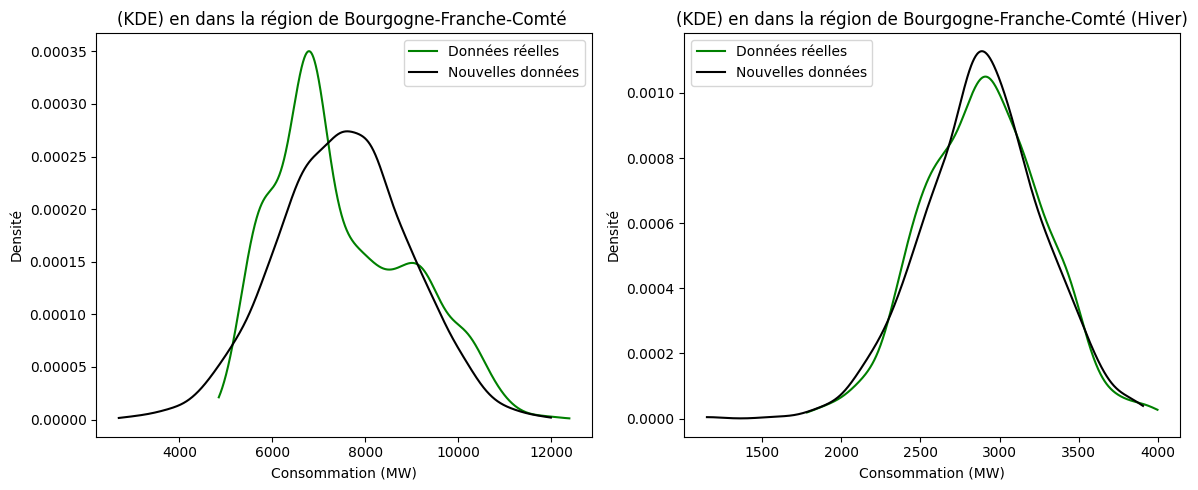

In [ ]:
# Tout d'abord, nous trouvons l'estimateur KDE pour l'ensemble des données de l'année.
Data_Consumption=dataframe_collection[0]["consumption"]
kde_real = gaussian_kde(Data_Consumption)
x_real = np.linspace(Data_Consumption.min() - 1, Data_Consumption.max() + 1, len(Data_Consumption))
density_real = kde_real(x_real)
# Génération de données avec les estimateurs de moyenne et de variance
new_data_mean = np.mean(Data_Consumption)
new_data_std = np.std(Data_Consumption, ddof=1) # Utilisez l'estimateur de la variance
New_data= np.random.normal(new_data_mean, new_data_std, len(Data_Consumption))
# Estimation de la densité des données générées avec KDE
kde_new = gaussian_kde(New_data)
x_new = np.linspace(New_data.min() - 1, New_data.max() + 1, len(Data_Consumption))
density_new = kde_new(x_new)

Data_ConsumptionB=dataframe_collection_Winter[1]["consumption"]
kde_realB = gaussian_kde(Data_ConsumptionB)
x_realB = np.linspace(Data_ConsumptionB.min() - 1, Data_ConsumptionB.max() + 1, len(Data_ConsumptionB))
density_realB = kde_realB(x_realB)
# Génération de données avec les estimateurs de moyenne et de variance
new_data_mean = np.mean(Data_ConsumptionB)
new_data_std = np.std(Data_ConsumptionB, ddof=1) # Utilisez l'estimateur de la variance
New_dataB= np.random.normal(new_data_mean, new_data_std, len(Data_ConsumptionB))
# Estimation de la densité des données générées avec KDE
kde_newB = gaussian_kde(New_dataB)
x_newB = np.linspace(New_dataB.min() - 1, New_dataB.max() + 1, len(Data_ConsumptionB))
density_newB = kde_newB(x_newB)

# Graphique de l'estimateur de la densité du noyau
# Créez une figure avec deux sous-graphiques disposés horizontalement
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Tracez le KDE pour les données réelles et les nouvelles données dans le premier sous-graphique (ax1)
ax1.plot(x_real, density_real, label='Données réelles', color='green')
ax1.plot(x_new, density_new, label='Nouvelles données', color='black')
ax1.set_xlabel('Consommation (MW)')
ax1.set_ylabel('Densité')
ax1.set_title('(KDE) en dans la région de Bourgogne-Franche-Comté ')
ax1.legend()

# Tracez le KDE pour les données réelles et les nouvelles données dans le deuxième sous-graphique (ax2)
ax2.plot(x_realB, density_realB, label='Données réelles', color='green')
ax2.plot(x_newB, density_newB, label='Nouvelles données', color='black')
ax2.set_xlabel('Consommation (MW)')
ax2.set_ylabel('Densité')
ax2.set_title('(KDE) en dans la région de Bourgogne-Franche-Comté (Hiver)')
ax2.legend()

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()




## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

**1.** Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

La distribution a posteriori pour $\mu$ est modelée comme une distribution normale (gaussienne) lorsque les distributions a priori et de vraisemblance sont également gaussiennes. Cette distribution a posteriori est obtenue en appliquant le théorème de Bayes:

$$ \text{Posterior}(\mu | x_1, x_2, \ldots, x_n) \propto \text{Prior}(\mu) \times \text{Likelihood}(\mu)$$

Où: $\text{Posterior}(\mu | x_1, x_2, \ldots, x_n)$ est la loi a posteriori pour $\mu$ compte tenu des données observées $x_1, x_2, \ldots, x_n$.

$\text{Prior}(\mu)$ est la distribution a priori pour $\mu, \mathcal{N}(\mu_0, \sigma_0^2)$, avec $\mu_0 = 3500$ MW et $\sigma_0 = 500$ MW. et


$$\text{Likelihood}(\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)$$

En utilisant la distribution a priori et la distribution de vraisemblance, qui sont toutes deux gaussiennes, on peut déterminer la distribution a posteriori. Cette distribution pour la moyenne $\mu$ restera également gaussienne. Un élément essentiel de cette distribution est sa moyenne (l'espérance), qui est calculée comme suit :

$$\mu_{\text{posterior}} = \frac{\sigma^2}{\sigma_0^2 + \frac{\sigma^2}{n}}\mu_0 + \frac{\frac{\sigma^2}{n}}{\sigma_0^2 + \frac{\sigma^2}{n}}\bar{x}$$

où $\bar{x}$ est la moyenne des données observées $x_1, x_2, \ldots, x_n$. La variance de la distribution a posteriori est donnée par :
$$\sigma_{\text{posterior}}^2 = \frac{\sigma^2}{n + \frac{\sigma^2}{\sigma_0^2}} = \frac{1}{\frac{1}{\sigma^2}n + \frac{1}{\sigma_0^2}} $$

La loi a posteriori pour $\mu$ est donc une distribution normale avec une moyenne $\mu_{\text{posterior}}$ et une variance $\sigma_{\text{posterior}}^2$.



**2.** Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [ ]:
# On retrouve les paramètres de la loi a posteriori pour la région Bretagne en hiver.
region = "Bretagne"
df_region = df[df.region == region]
variance_1=400**2
mean_0=3500
variance_0=500**2


Region_Date= df_region.copy()
Region_Date.sort_values(by='date',ascending=False)

# Convert the 'date' column to a datetime data type
Region_Date['date'] = pd.to_datetime(Region_Date['date'])

# Define the start date (December 22th)
start_date = pd.to_datetime('2013-12-22')
# Define the end date (March 12th)
end_date = pd.to_datetime('2014-03-21')
filtered_data_in = Region_Date[(Region_Date['date'] >= start_date) & (Region_Date['date'] <= end_date)]
Data_Consumption_winter=filtered_data_in["consumption"]
# We define the array of years, mean and variance
Years=['2013','2014','2015','2016', '2017', '2018', '2019', '2020', '2021', '2022']
mean_posterior=np.zeros(10)
variance_posterior=np.zeros(10)

# We compute the mean and variance for the days between 2013 and 2014 in Winter
data_mean = np.mean(Data_Consumption_winter)
data_std = np.std(Data_Consumption_winter, ddof=1) # Utilisez l'estimateur de la variance
n=len(Data_Consumption_winter)
mean_posterior[0]=(variance_1/(variance_0+(variance_1/n)))*mean_0 +((variance_1/n)/(variance_0+(variance_1/n)))*data_mean
variance_posterior[0]=(variance_1/(n+(variance_1/variance_0)))

# We compute the mean and variance for all the years in the Winter Period
count=1
for x in range (2014,2023):
  start_date=pd.to_datetime(str(x)+'-12-22')
  end_date = pd.to_datetime(str(x+1)+'-03-21')
  filtered_data = Region_Date[(Region_Date['date'] >= start_date) & (Region_Date['date'] <= end_date)]
  Data_Consumption_winter=filtered_data_in["consumption"]
  # Computation of mean and priori variance.
  n=len(Data_Consumption_winter)
  data_mean = np.mean(Data_Consumption_winter)
  mean_posterior[count]=(variance_1/(variance_0+(variance_1/n)))*mean_0 +((variance_1/n)/(variance_0+(variance_1/n)))*data_mean
  variance_posterior[count]=(variance_1/(n+(variance_1/variance_0)))
  count=count+1
  Data_Final=pd.concat([filtered_data_in, filtered_data],axis=0)
  # Data final
  # Create a new DataFrame containing only the data within the specified date range
  filtered_data_in=Data_Final

columns2 = ["Année","Moyenne Posterior","Variance Posterior" ]
Data_estimateurs=np.transpose(np.array([Years,mean_posterior, variance_posterior]))
E_Dataframe = pd.DataFrame(data=Data_estimateurs,columns=columns2)
E_Dataframe

,Année,Moyenne Posterior,Variance Posterior
0,2013,2246.0176914778854,1765.22506619594
1,2014,2246.0176914778854,1765.22506619594
2,2015,2243.259364235804,885.7395925597875
3,2016,2242.1447096520737,589.0148726255338
4,2017,2241.665640766701,442.42893485233935
5,2018,2241.3750896707365,354.2644584182092
6,2019,2241.1401686751037,295.3991581123994
7,2020,2240.9639989627553,252.90844714213455
8,2021,2240.862348673516,221.4103841470165
9,2022,2240.7668716059657,196.88915140775742


**3.**Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

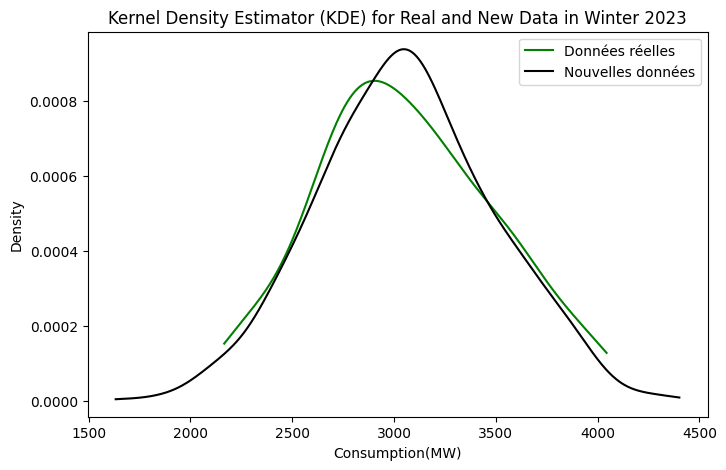

In [ ]:
# L'une des méthodes d'estimation de la PDF consiste à utiliser la méthode d'estimation de la densité de Kernel.
# Tout d'abord, on commence par l'estimation des données réelles.

# Define the start date (December 22th)
start_date = pd.to_datetime('2022-12-22')
# Define the end date (March 12th)
end_date = pd.to_datetime('2023-03-21')
filtered_data_in = Region_Date[(Region_Date['date'] >= start_date) & (Region_Date['date'] <= end_date)]
Data_Consumption_winter2023=filtered_data_in["consumption"]

kde_real_winter = gaussian_kde(Data_Consumption_winter2023)
x_realw = np.linspace(Data_Consumption_winter2023.min() - 1, Data_Consumption_winter2023.max() + 1, n)
density_realw = kde_real_winter(x_realw)

# Génération de données avec les estimateurs de moyenne et de variance
new_data_mean = np.mean(Data_Consumption_winter2023)
new_data_std = np.std(Data_Consumption_winter2023, ddof=1) # Utilisez l'estimateur de la variance
New_data_winter = np.random.normal(new_data_mean, new_data_std, n)

# Estimation de la densité des données générées avec KDE
kde_new_winter = gaussian_kde(New_data_winter)
x_new_winter= np.linspace(New_data_winter.min() - 1, New_data_winter.max() + 1, n)
density_new_winter = kde_new_winter(x_new_winter)

# Graphique de l'estimateur de la densité du noyau
plt.figure(figsize=(8,5))
plt.plot(x_realw, density_realw, label='Données réelles', color='green')
plt.plot(x_new_winter, density_new_winter, label='Nouvelles données', color='black')
plt.xlabel('Consumption(MW)')
plt.ylabel('Density')
plt.title('Kernel Density Estimator (KDE) for Real and New Data in Winter 2023')
plt.legend()
plt.show()

**4.** Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

In [ ]:
# Comme nous avons déjà calculé les KDE dans la section A et pris en compte la mesure de dissimilarité, on peut procéder à l'intégration numérique.
# Intégrande de la dissimilarité
integrand = lambda x: (1/2) * abs(kde_real_winter(x) - kde_new_winter(x))

# Calculez la dissimilarité en effectuant l'intégration numérique
dissimilarity, _ = quad(integrand, x_realw.min(), x_realw.max())

# La valeur de "dissimilarity" représente la dissimilarité entre le KDE des données réelles et la densité des nouvelles données.
print("la dissimilarité entre le KDE des des données réelles et de la densité du modèle gaussien est égale à :" + str(dissimilarity))

la dissimilarité entre le KDE des des données réelles et de la densité du modèle gaussien est égale à :0.041914377725384734


En comparant avec les résultats de la partie A, on constate que les courbes PDF pour les nouvelles données et les données réelles sont plus éloignées l'une de l'autre, comme le montre le fait que la valeur de la mesure de dissimilarité est plus élevée dans le cas de la statistique bayésienne, On pourrait dire que l'inférence bayésienne pourrait être plus précise si les paramètres a priori étaient plus proches de ceux de la vraie distribution, de même l'inférence bayésienne se comporte mieux lorsque la taille de l'échantillon $n$ est plus petite, en tout cas pour les deux méthodes d'inférence statistique on a obtenu des résultats acceptables.

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

**1.** Proposez la statisque du test pour un niveau $\alpha$.

On pourrait utiliser un test du rapport de vraisemblance (LRT). La façon de formuler la statistique de test pour un niveau de signification de $\alpha$ est décrite ci-dessous : \\
*Hypothèses:*  $H_0$ : L'écart-type de la consommation d'électricité en hiver en Bretagne en 2023 est de 500 MW.
$H_1$ : L'écart-type de la consommation d'électricité en hiver en Bretagne en 2023 n'est pas de 500 MW. \\
*Le calcul des statistiques de test:* la statistique de test du rapport de vraisemblance ($LRT$) est définie de la manière suivante :
$$ LRT = -2 \ln\left(\frac{L(H_0)}{L(H_1)}\right) $$
où $L(H_0)$ est la vraisemblance sous l'hypothèse nulle ($H_0$) et $L(H_1)$ est la vraisemblance sous l'hypothèse alternative ($H_1$).
Cette statistique $LRT$ est approximativement conforme à une distribution chi-carré ($\chi^2$) avec 1 degré de liberté. \\
*On choisit le niveau de signification* $\alpha$, par exemple $\alpha = 0,01$ pour un seuil de 1%. \\
*Choix:* on compare la valeur calculée de la statistique de test $LRT$ à la valeur critique de la distribution $\chi^2$ avec 1 degré de liberté pour $\alpha$. Si $LRT$ est supérieur au seuil critique, on peut rejeter l'hypothèse nulle ($H_0$).


2. Donnez le résultat de ce test pour $\alpha=1\%$.

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

**1.** Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

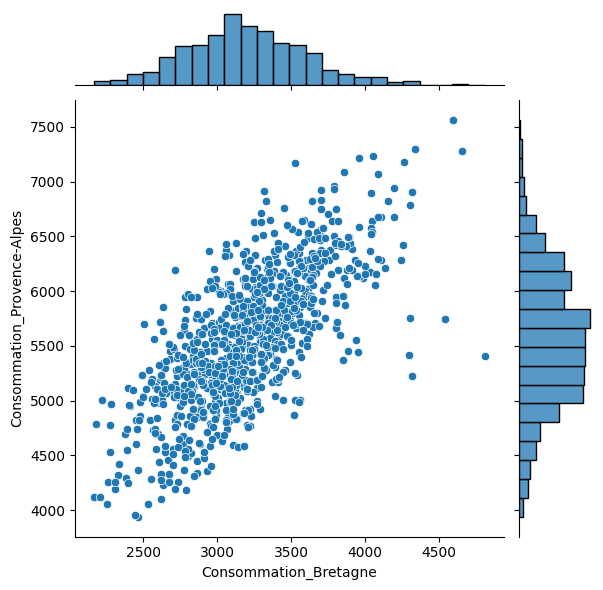

In [ ]:
# La première étape consiste à obtenir des échantillons les jours d'hiver.

region1 = "Bretagne"
df_region1 = df[df.region == region1]
#"Provence-Alpes-Côte d'Azur"
region2 = "Provence-Alpes-Côte d'Azur"
df_region2 = df[df.region == region2]

Region_Date1= df_region1.copy()
Region_Date1.sort_values(by='date',ascending=False)

Region_Date2= df_region2.copy()
Region_Date2.sort_values(by='date',ascending=False)

# Convert the 'date' column to a datetime data type
Region_Date1['date'] = pd.to_datetime(Region_Date1['date'])
Region_Date2['date'] = pd.to_datetime(Region_Date2['date'])

# Define the start date (December 22th)
start_date = pd.to_datetime('2013-12-22')
# Define the end date (March 12th)
end_date = pd.to_datetime('2014-03-21')
filtered_data_in1 = Region_Date1[(Region_Date1['date'] >= start_date) & (Region_Date1['date'] <= end_date)]
filtered_data_in2 = Region_Date2[(Region_Date2['date'] >= start_date) & (Region_Date2['date'] <= end_date)]

for x in range (2014,2023):
  start_date=pd.to_datetime(str(x)+'-12-22')
  end_date = pd.to_datetime(str(x+1)+'-03-21')
  filtered_data1 = Region_Date1[(Region_Date1['date'] >= start_date) & (Region_Date1['date'] <= end_date)]
  filtered_data2 = Region_Date2[(Region_Date2['date'] >= start_date) & (Region_Date2['date'] <= end_date)]

  Data_Final1=pd.concat([filtered_data_in1, filtered_data1],axis=0)
  Data_Final2=pd.concat([filtered_data_in2, filtered_data2],axis=0)
  # Create a new DataFrame containing only the data within the specified date range
  filtered_data_in1=Data_Final1
  filtered_data_in2=Data_Final2

Data_Consumption1=Data_Final1["consumption"]
Data_Consumption2=Data_Final2["consumption"]

# Créez un DataFrame

columns2 = ["Consommation_Bretagne","Consommation_Provence-Alpes" ]
joinData=np.transpose(np.array([Data_Consumption1,Data_Consumption2]))
J_Dataframe = pd.DataFrame(data=joinData,columns=columns2)

# Tracez le nuage de points avec estimation de la loi jointe
sns.jointplot(data=J_Dataframe, x="Consommation_Bretagne", y="Consommation_Provence-Alpes", kind="scatter")

# Affichez le graphique
plt.show()


**2.** Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Si on regarde le graphique de la loi jointe du graphique précédent, on peut voir que les deux variables ont une corrélation positive que l'on pourrait dire proche de un, ce qui nous amènerait à penser que les variables sont corrélées, donc on pourrait dire que la consommation dans les deux régions tend à être dépendante, mais c'est essentiellement parce que les habitudes de consommation d'énergie sont presque similaires pour toutes les régions et non pas parce qu'il y a une réelle corrélation entre les variables.

**3.** Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$.

Pour tester l'indépendance entre les consommations d'électricité en Bretagne et en Provence-Alpes-Côte d'Azur, en utilisant le test du  ($\chi^2$) pour l'indépendance, nous pouvons procéder comme suit :

*Hypothèses :* ($H_0$) : La consommation d'électricité dans les deux régions est indépendante.
($H_1$) : La consommation d'électricité dans les deux régions n'est pas indépendante. \\
à partir de la loi jointe, on peut construire un tableau de contingence utilisé plus tard. \\
*Calcul de la statistique de test $\chi^2$*
Calculer la statistique de test $\chi^2$ à l'aide du tableau de contingence en appliquant la formule :
$$\chi^2 = \sum \frac{(O - E)^2}{E}$$
Où, *O:* Observation et
*E:* Fréquence espérée dans chaque cellule, obtenue sous l'hypothèse nulle d'indépendance.

Ensuite, on calcule les degrés de liberté ($df$) en fonction de la taille du tableau de contingence.
l'étape suivante consiste à choisir un niveau de signification $\alpha$ (par exemple $\alpha=0,01$) pour votre test.

*Prise de décision* : Comparez la statistique de test $\chi^2$ à la valeur critique du $\chi^2$ correspondant aux degrés de liberté et au niveau de signification $\alpha$.

Si $\chi^2$ observé > $\chi^2$ critique, rejetez l'hypothèse nulle ($H_0$).
Si $\chi^2$ observé <= $\chi^2$ critique, ne rejetez pas $H_0$

4. Donnez le résultat de ce test pour $\alpha=1\%$.

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

**1.** Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [ ]:
# nous calculons la moyenne et l'écart-type de la distribution
new_data_mean = np.mean(Data_Consumption)
new_data_std = np.std(Data_Consumption, ddof=1) # Utilisez l'estimateur de la variance
# On détermine la taille de l'échantillon
n=len(Data_Consumption)
# En utilisant la distribution de Student (t), il est possible de trouver le quantile approprié à partir des tableaux de distribution t.
# Pour un niveau de confiance de 95 %, avec n-1 degrés de liberté, le quantile de t est généralement d'environ 1,96.
t=1.96
alpha=0.05
# On Calcule la marge d'erreur (ME)
ME=(t*(alpha/2)*new_data_std)/(n**(1/2))
# On calcule l'intervale de Confiance:
IC1=new_data_mean-ME
IC2=new_data_mean+ME
print("Alors, on peut dire avec 95% de certitude que la vraie valeur de la moyenne est comprise entre:" + str(IC1) + " et " + str(IC2))

Alors, on peut dire avec 95% de certitude que la vraie valeur de la moyenne est comprise entre:3197.5322193643983 et 3198.8668937176412


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.